#Fare Price Prediction

**Problem Statement**

We have been provided a dataset of a cab facility providing company, which is basically providing or doing the business of earning money from providing customers the cabs to travel from their position to destination in a particular city. Given various independent features our task is to predict the fare amount of the rides by each customer every time.

So the problem is of regression only as we have to predict the continuous target variable. We are going to use some regression techniques to predict the fare price. Also I will be predicting the fare amount using PySpark.

Fare Amount Prediction

The dataset “trips.csv” contains the following fields:


**key** - a unique identifier for each trip


**fare_amount** - the cost of each trip in usd


**pickup_datetime** - date and time when the meter was engaged


**passenger_count** - the number of passengers in the vehicle (driver entered value)

**pickup_longitude** - the longitude where the meter was engaged

**pickup_latitude** - the latitude where the meter was engaged

**dropoff_longitude** - the longitude where the meter was disengaged

**dropoff_latitude** - the latitude where the meter was disengaged

– We need to analyse the data and create an efficient model that will estimate the fare prices accurately. 


**Importing Required libraries**

In [1]:
#Importing required libraries
import os #getting access to input files
import pandas as pd # Importing pandas for performing EDA
import numpy as np  # Importing numpy for Linear Algebric operations
import matplotlib.pyplot as plt # Importing for Data Visualization
import seaborn as sns # Importing for Data Visualization
from collections import Counter 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split #splitting dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV    

%matplotlib inline

**loading and reading the dataset**

In [2]:
# Reading and viewing the csv file.

df = pd.read_csv('C:/Users/SHIVA/Downloads/trip.csv')
df.head()

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


#checking the number of rows and columns

In [3]:
df.shape

(200000, 9)

In [4]:
df.columns

Index(['index', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

#checking the data-types in dataset

In [5]:
df.isnull().sum()

index                0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [7]:
df.describe()

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


#Data Cleaning & Missing Value Analysis :

In [8]:
df.dropna(subset= ["pickup_datetime"])   #dropping NA values in datetime column

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


# Here pickup_datetime variable is in object so we need to change its data type to datetime

In [9]:
df['pickup_datetime'] =  pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')


#we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc

In [10]:
df['year'] = df['pickup_datetime'].dt.year
df['Month'] = df['pickup_datetime'].dt.month
df['Date'] = df['pickup_datetime'].dt.day
df['Day'] = df['pickup_datetime'].dt.dayofweek
df['Hour'] = df['pickup_datetime'].dt.hour
df['Minute'] = df['pickup_datetime'].dt.minute

In [11]:
#Re-checking datatypes after conversion
df.dtypes 


index                         int64
key                          object
fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object

#Missing Values treatment

In [12]:
#removing datetime missing values rows
df = df.drop(df[df['pickup_datetime'].isnull()].index, axis=0)
print(df.shape)
print(df['pickup_datetime'].isnull().sum())

(200000, 15)
0


Checking the passenger count variable :

In [13]:
df["passenger_count"].describe()


count    200000.000000
mean          1.684535
std           1.385997
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         208.000000
Name: passenger_count, dtype: float64

We can see maximum number of passanger count is 208 which is actually not possible. So reducing the passenger count to 6 (even if we consider the SUV)

In [14]:
df = df.drop(df[df["passenger_count"]> 6 ].index, axis=0)


In [15]:
df["passenger_count"].describe()


count    199999.000000
mean          1.683503
std           1.306967
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: passenger_count, dtype: float64

In [16]:
df["passenger_count"].sort_values(ascending= True)


89854     0
35212     0
122964    0
16209     0
101601    0
         ..
102978    6
115038    6
4376      6
156984    6
55346     6
Name: passenger_count, Length: 199999, dtype: int64

There are passengers with count value of 0 which is not required. Hence we will remove 0 passenger values.




In [17]:
df = df.drop(df[df["passenger_count"] == 0 ].index, axis=0)
df.shape


(199290, 15)

Next checking the Fare Amount variable :

In [18]:
##finding decending order of fare to get to know whether the outliers are present or not
df["fare_amount"].sort_values(ascending=False)

170081    499.00
4292      350.00
185325    275.00
71715     250.00
197493    230.00
           ...  
92063     -23.70
89322     -49.57
164056    -50.50
111589    -52.00
98875     -52.00
Name: fare_amount, Length: 199290, dtype: float64

In [19]:
Counter(df["fare_amount"]<0)


Counter({False: 199273, True: 17})

In [20]:
df = df.drop(df[df["fare_amount"]<0].index, axis=0)
df.shape

(199273, 15)

In [21]:
##making sure that there is no negative values in the fare_amount variable column
df["fare_amount"].min()


0.0

In [22]:
#Also remove the row where fare amount is zero
df = df.drop(df[df["fare_amount"]<1].index, axis=0)
df.shape

(199265, 15)

In [23]:
df['fare_amount'].isnull().sum()

0

In [24]:
df["fare_amount"].describe()

count    199265.000000
mean         11.369588
std           9.905854
min           2.500000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64

**Now checking the pickup lattitude and longitude :**

In [25]:
#Lattitude----(-90 to 90)
#Longitude----(-180 to 180)

# we need to drop the rows having  pickup lattitute and longitute out the range mentioned above

df[df['pickup_latitude']<-90]
df[df['pickup_latitude']>90]

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
56617,14257861,2012-03-11 07:24:00.00000031,8.1,2012-03-11 07:24:00,-73.960828,404.433332,-73.988357,40.769037,1,2012,3,11,6,7,24
61793,2849369,2012-06-13 05:45:00.0000006,8.5,2012-06-13 05:45:00,-73.951385,401.066667,-73.982110,40.754117,1,2012,6,13,2,5,45
75851,33249845,2011-11-05 00:22:00.00000051,15.7,2011-11-05 00:22:00,-1340.648410,1644.421482,-3356.666300,872.697628,1,2011,11,5,5,0,22
91422,23566642,2011-05-18 13:24:00.000000213,16.1,2011-05-18 13:24:00,57.418457,1292.016128,1153.572603,-881.985513,1,2011,5,18,2,13,24


In [26]:
#Hence dropping one value of >90
df = df.drop((df[df['pickup_latitude']<-90]).index, axis=0)
df = df.drop((df[df['pickup_latitude']>90]).index, axis=0)

In [27]:
df[df['pickup_longitude']<-180]
df[df['pickup_longitude']>180]


,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [28]:
df.shape

(199261, 15)

In [29]:
df.isnull().sum()

index                0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

#Now we have cleaned our datasets. Thus proceeding for further operations:

**Calculating distance based on the given coordinates :**

In [30]:
#We have given pickup longitute and latitude values and same for drop. 
#So we need to calculate the distance Using the haversine formula and we will create a new variable called distance
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km
# 1min 

In [31]:
df['distance'] = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)


In [32]:
df.head()

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3,19,52,1.683323
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,4,20,4,2.457590
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0,21,45,5.036377
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,4,8,22,1.661683
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,3,17,47,4.475450


In [33]:
df.nunique()

index                199261
key                  199261
fare_amount            1228
pickup_datetime      195891
pickup_longitude      71007
pickup_latitude       83750
dropoff_longitude     76824
dropoff_latitude      90490
passenger_count           6
year                      7
Month                    12
Date                     31
Day                       7
Hour                     24
Minute                   60
distance             193641
dtype: int64

In [34]:
##finding decending order of fare to get to know whether the outliers are presented or not
df['distance'].sort_values(ascending=False)

139447    10321.507661
65591      8782.898606
34594      8776.106279
140620     8708.233063
165324     8681.105930
              ...     
162707        0.000000
45209         0.000000
15830         0.000000
185728        0.000000
155297        0.000000
Name: distance, Length: 199261, dtype: float64

As we can see that top few values in the distance variables are very high. It means that more than 8000 Kms distance they have travelled Also just after those values from the top, the distance goes down to 127, which means these values are showing some outliers We need to remove these values

In [35]:

Counter(df['distance'] == 0)


Counter({False: 193649, True: 5612})

In [36]:
Counter(df['fare_amount'] == 0)


Counter({False: 199261})

In [37]:
###we will remove the rows whose distance value is zero

df = df.drop(df[df['distance']== 0].index, axis=0)
df.shape

(193649, 16)

In [38]:
#we will remove the rows whose distance values is very high which is more than 129kms
df = df.drop(df[df['distance'] > 130 ].index, axis=0)
df.shape

(193214, 16)

In [39]:
df.head()

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3,19,52,1.683323
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,4,20,4,2.457590
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0,21,45,5.036377
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,4,8,22,1.661683
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,3,17,47,4.475450


Now we have splitted the pickup date time variable into different varaibles like month, year, day etc so now we dont need to have that pickup_Date variable now. Hence we can drop that, Also we have created distance using pickup and drop longitudes and latitudes so we will also drop pickup and drop longitudes and latitudes variables.

In [58]:
drop = ['key','pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
df = df.drop(drop, axis = 1)

In [59]:
df.head()

,index,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,24238194,2.140066,1,2015,5,7,3,19,0.987056
1,27835199,2.163323,1,2009,7,17,4,20,1.240572
2,44984355,2.631889,1,2009,8,24,0,21,1.797804
3,25894730,1.840550,3,2009,6,26,4,8,0.978959
4,17610152,2.833213,5,2014,8,28,3,17,1.700274


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193214 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   index            193214 non-null  int64  
 1   fare_amount      193214 non-null  float64
 2   passenger_count  193214 non-null  int64  
 3   year             193214 non-null  int64  
 4   Month            193214 non-null  int64  
 5   Date             193214 non-null  int64  
 6   Day              193214 non-null  int64  
 7   Hour             193214 non-null  int64  
 8   distance         193214 non-null  float64
dtypes: float64(2), int64(7)
memory usage: 19.7 MB


In [61]:
df.dtypes

index                int64
fare_amount        float64
passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [62]:
df = df.drop('index', 1)

In [64]:
df.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,2.140066,1,2015,5,7,3,19,0.987056
1,2.163323,1,2009,7,17,4,20,1.240572
2,2.631889,1,2009,8,24,0,21,1.797804
3,1.840550,3,2009,6,26,4,8,0.978959
4,2.833213,5,2014,8,28,3,17,1.700274


In [65]:
dff = df.copy()

#Data Visualization :
**Visualization the following:**

1. Number of Passengers effects the the fare

2. Pickup date and time effects the fare

3. Day of the week does effects the fare

4. Distance effects the fare

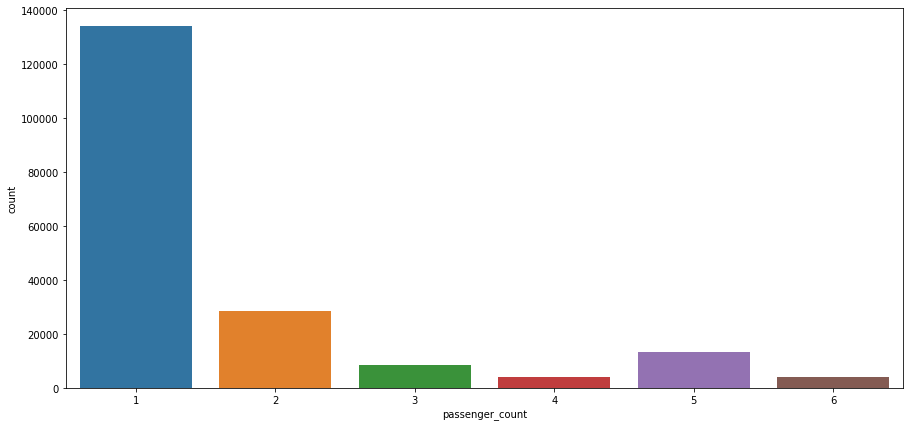

In [66]:
# Count plot on passenger count
plt.figure(figsize=(15,7))
sns.countplot(x="passenger_count", data=df)

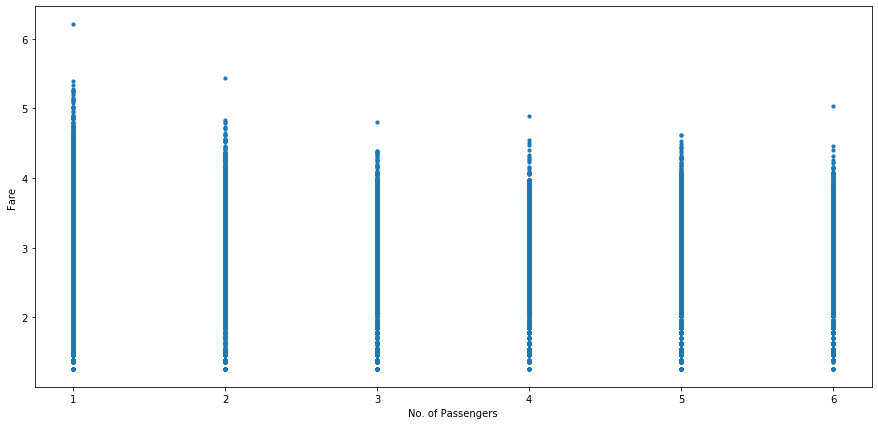

In [67]:
#Relationship beetween number of passengers and Fare

plt.figure(figsize=(15,7))
plt.scatter(x=df['passenger_count'], y=df['fare_amount'], s=10)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')
plt.show()

**Observations :**

By seeing the above plots we can easily conclude that:

1. single travelling passengers are most frequent travellers.
2. At the sametime we can also conclude that highest Fare are coming from single & double travelling passengers.

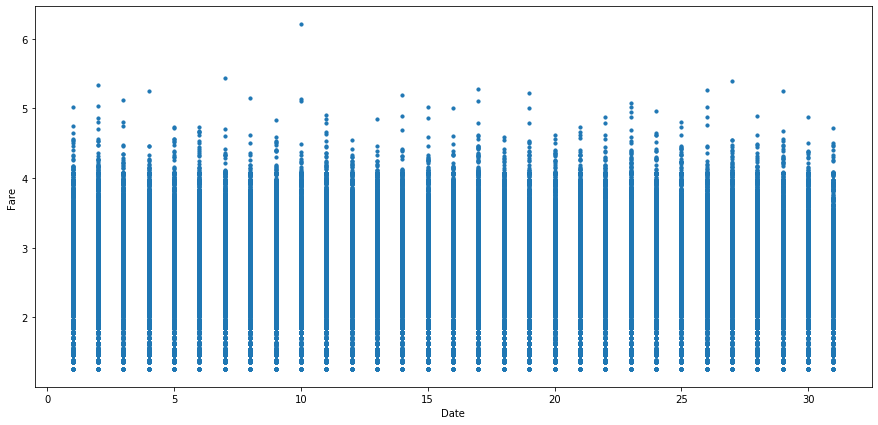

In [68]:
#Relationship between date and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=df['Date'], y=df['fare_amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

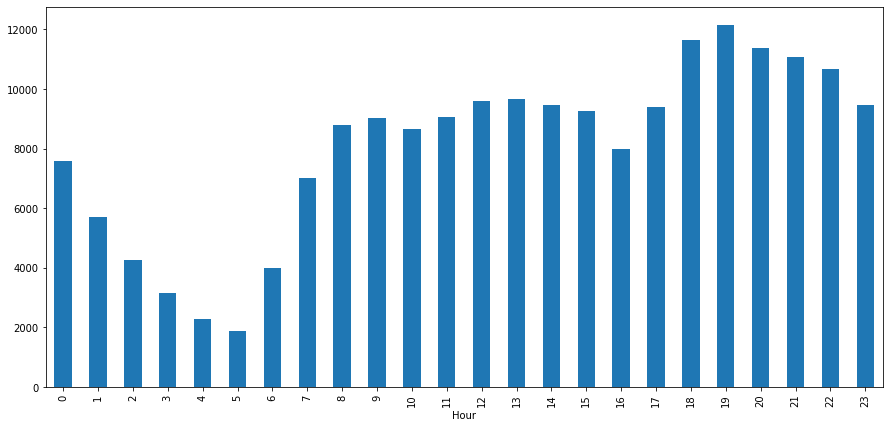

In [69]:
plt.figure(figsize=(15,7))
df.groupby(df["Hour"])['Hour'].count().plot(kind="bar")
plt.show()

Lowest cabs at **5 AM** and highest at and around **7 PM** i.e the office rush hours.

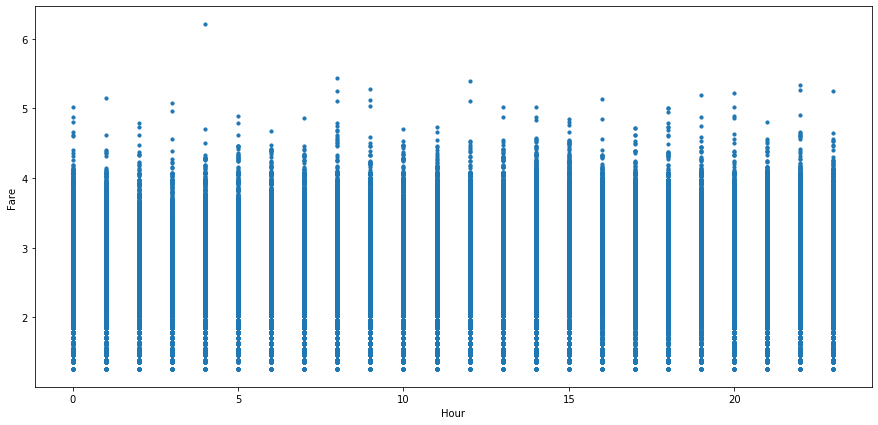

In [70]:
#Relationship between Time and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=df['Hour'], y=df['fare_amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

From the above plot We can observe that the cabs taken at 7 am and 23 Pm are the costliest. Hence we can assume that cabs taken early in morning and late at night are costliest

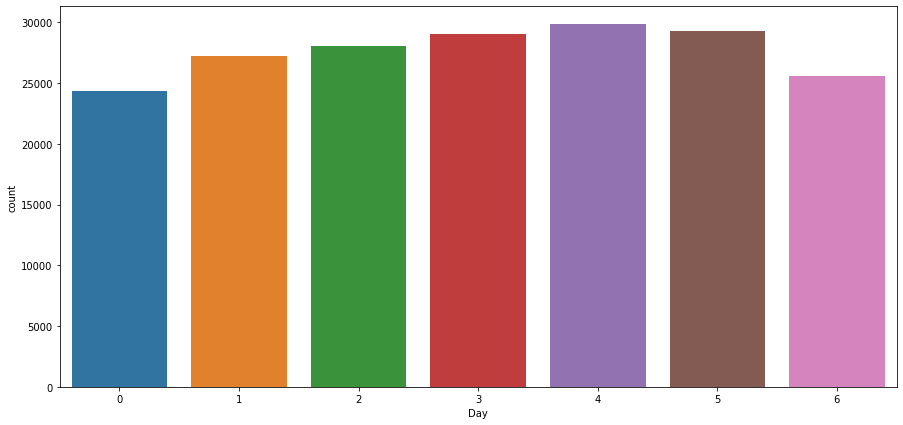

In [71]:
#impact of Day on the number of cab rides
plt.figure(figsize=(15,7))
sns.countplot(x="Day", data=df)

**Observation :** The day of the week does not seem to have much influence on the number of cabs ride

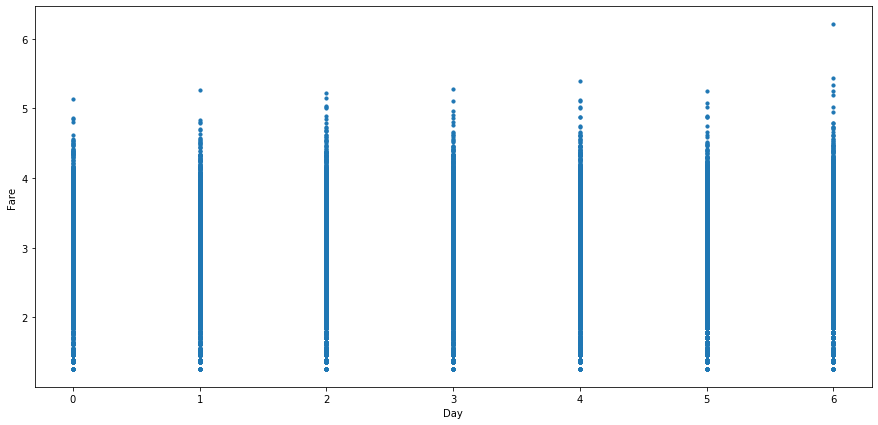

In [72]:
#Relationships between day and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=df['Day'], y=df['fare_amount'], s=10)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()

The highest fares seem to be on a Sunday, Monday and Thursday, and the low on Wednesday and Saturday. May be due to low demand of the cabs on saturdays the cab fare is low and high demand of cabs on sunday and monday shows the high fare prices

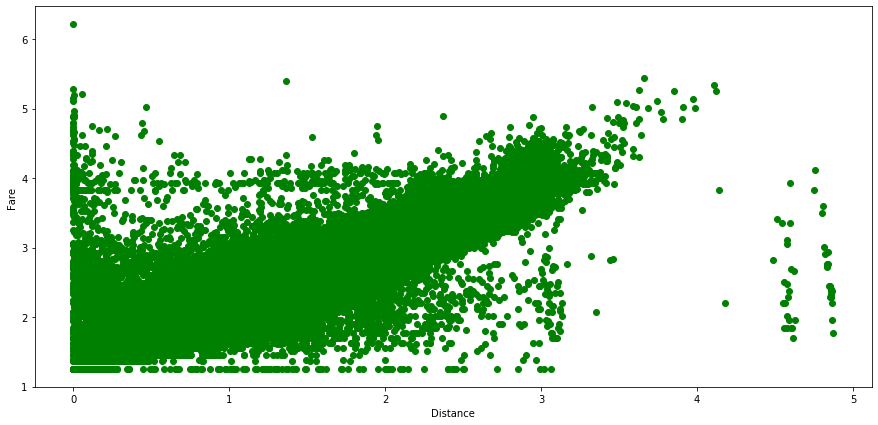

In [73]:
#Relationship between distance and fare 
plt.figure(figsize=(15,7))
plt.scatter(x = df['distance'],y = df['fare_amount'],c = "g")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

It is quite obvious that distance will effect the amount of fare

#Feature Scaling :

fare_amount


C:\Users\SHIVA\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


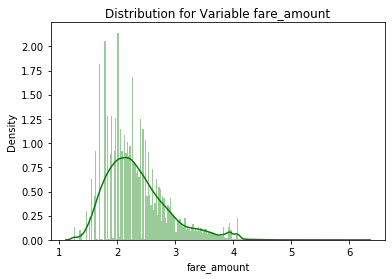

distance


C:\Users\SHIVA\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


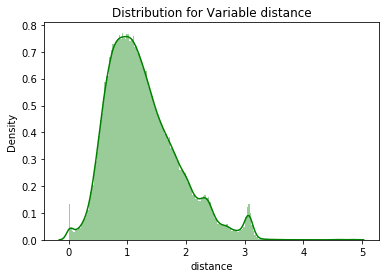

In [74]:
#Normality check of training data is uniformly distributed or not-

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(df[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [75]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
df['fare_amount'] = np.log1p(df['fare_amount'])

#since skewness of distance variable is high, apply log transform to reduce the skewness-
df['distance'] = np.log1p(df['distance'])

fare_amount


C:\Users\SHIVA\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


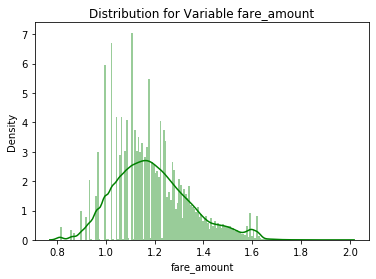

distance


C:\Users\SHIVA\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


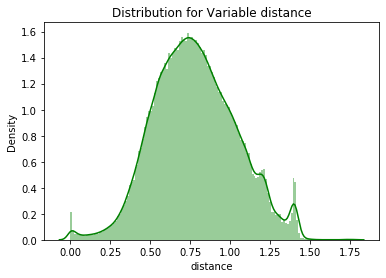

In [76]:
#Normality Re-check to check data is uniformly distributed or not after log transformartion

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(df[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

Here we can see bell shaped distribution. Hence our continous variables are now normally distributed, we will use not use any Feature Scalling technique. i.e, Normalization or Standarization for our training data

#Applying ML ALgorithms:

**Train test split and defining model parameters**

In [77]:
##train test split for further modelling
X_train, X_test, y_train, y_test = train_test_split( dff.iloc[:, df.columns != 'fare_amount'], 
                         dff.iloc[:, 0], test_size = 0.20, random_state = 1)

In [78]:
print(X_train.shape)
print(X_test.shape)

(154571, 7)
(38643, 7)


In [79]:
def train_model(model,X_train,y_train,X_test,y_test):
  
  model.fit(X_train,y_train)
  pred_value=model.predict(X_test)
  MSE=mean_squared_error(y_test,pred_value)
  RMSE=np.sqrt(MSE)
  r2=r2_score(y_test,pred_value)
  adj_r2=1-(1-r2_score(y_test,pred_value))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print(f'Evaluation matrix-- \n MSE: {MSE}\n RMSE: {RMSE}\n r2Score: {r2}\n adj_r2: {adj_r2}\n')
  print('Evaluation Graph')
  plt.figure(figsize=(10,5))
  p1=plt.plot(pred_value[:100])
  p2=plt.plot(np.array(y_test[:100]))
  plt.legend(["ACTUAL","PREDICTED"],prop={'size': 10})
  plt.show()

Evaluation matrix-- 
 MSE: 0.06710337004001926
 RMSE: 0.25904318180569674
 r2Score: 0.7741647953463608
 adj_r2: 0.7741238778769012

Evaluation Graph


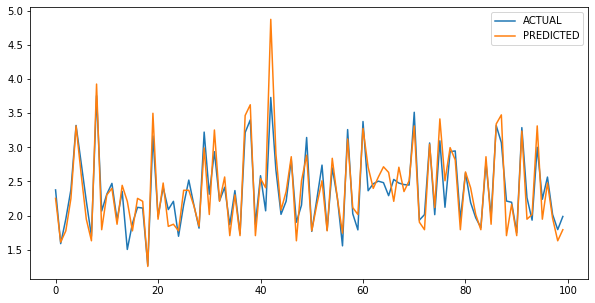

In [80]:
#Implementing linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

train_model(reg,X_train,y_train,X_test,y_test)

**Using Random Forest Model :**

Evaluation matrix-- 
 MSE: 0.05764092595755853
 RMSE: 0.24008524727179412
 r2Score: 0.806010483493047
 adj_r2: 0.8059753359166125

Evaluation Graph


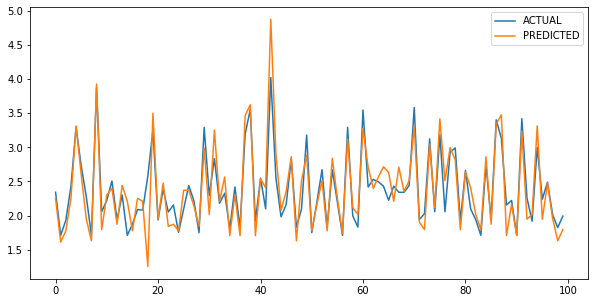

In [82]:
rf_model = RandomForestRegressor()
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)
train_model(rf_grid,X_train,y_train,X_test,y_test)


**Prediction of fare from provided test dataset :**

We have already cleaned and processed our test dataset along with our training dataset. Hence we will be predicting using grid search CV for random forest model

In [83]:
model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(X_train, y_train)
predict = model.predict(X_test)
print(predict)
print(predict.shape)

[2.29659014 1.71383944 1.92393159 ... 2.32822498 2.83870724 1.95045104]
(38643,)


In [84]:
import pickle

In [86]:
with open ('C:/Users/SHIVA/Downloads/model_pickle2.pkl', 'wb') as f:
    pickle.dump(model, f)

In [87]:
with open('C:/Users/SHIVA/Downloads/model_pickle2.pkl', 'rb') as f:
    model = pickle.load(f)

In [89]:
pred_result = model.predict(X_test)

In [90]:
print(pred_result)

[2.29659014 1.71383944 1.92393159 ... 2.32822498 2.83870724 1.95045104]
